In [2]:
import pycaret as pycaret


Be sure PyCaret has been installed and imported 
Heart Disease is a dataset already in PyCaret along with other datasets. It will automatically print out the first 5 rows. The best tutorials are at https://github.com/pycaret/pycaret/tree/master/Tutorials

In [3]:
from pycaret.datasets import get_data
data = get_data('heart_disease')

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [6]:
data.dtypes

age                                       int64
sex                                       int64
chest pain type                           int64
resting blood pressure                    int64
serum cholestoral in mg/dl                int64
fasting blood sugar > 120 mg/dl           int64
resting electrocardiographic results      int64
maximum heart rate achieved               int64
exercise induced angina                   int64
oldpeak                                 float64
slope of peak                             int64
number of major vessels                   int64
thal                                      int64
Disease                                   int64
dtype: object

You need to tell PyCaret you want to use a classification model. Your data is named "data" and the column you want to predict is your target = 'Disease'

In [3]:
from pycaret.classification import *
exp1 = setup(data, target = 'Disease')

Setup Succesfully Completed!


,Description,Value
0,session_id,2611
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(270, 14)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


Peruse the data pre-processing that just took place above

PyCaret automatically splits the dataset into 70% training and 30% test. To validate different models (15) used for training it uses k-10 fold cross validation. You can select a model with good performance, e.g. logistic regression. Notice that algorithms are listed in decreasing order based on Accuracy. This will provide the training performance which you can later compare to testing performance

In [4]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Logistic Regression,0.8339,0.8819,0.7736,0.8542,0.8047,0.6612,0.6714,0.0734
1,Light Gradient Boosting Machine,0.8339,0.8659,0.8097,0.8260,0.8144,0.6643,0.6689,0.2170
2,Ridge Classifier,0.8289,0.0000,0.7639,0.8496,0.7985,0.6513,0.6610,0.0247
3,Linear Discriminant Analysis,0.8289,0.8877,0.7639,0.8496,0.7985,0.6513,0.6610,0.0133
4,Extreme Gradient Boosting,0.8284,0.8830,0.7736,0.8377,0.8017,0.6509,0.6561,0.1103
5,Extra Trees Classifier,0.8129,0.8988,0.7722,0.8110,0.7858,0.6196,0.6272,0.3280
6,Gradient Boosting Classifier,0.8076,0.8551,0.7625,0.7998,0.7764,0.6082,0.6144,0.1671
7,CatBoost Classifier,0.8020,0.8750,0.7736,0.7896,0.7778,0.5996,0.6046,3.2120
8,Ada Boost Classifier,0.7865,0.8438,0.7403,0.7905,0.7577,0.5680,0.5769,0.1744
9,Random Forest Classifier,0.7711,0.8537,0.6542,0.8061,0.7128,0.5269,0.5447,0.1279


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2611, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9474,0.9886,0.8750,1.0000,0.9333,0.8902,0.8956
1,0.8947,0.9773,0.8750,0.8750,0.8750,0.7841,0.7841
2,0.8421,0.8636,0.8750,0.7778,0.8235,0.6816,0.6854
3,0.7895,0.9091,0.7500,0.7500,0.7500,0.5682,0.5682
4,0.8947,0.9111,0.7778,1.0000,0.8750,0.7865,0.8051
5,0.8947,0.9111,0.7778,1.0000,0.8750,0.7865,0.8051
6,0.8421,0.9222,0.7778,0.8750,0.8235,0.6816,0.6854
7,0.7895,0.9222,0.7778,0.7778,0.7778,0.5778,0.5778
8,0.7778,0.8625,0.7500,0.7500,0.7500,0.5500,0.5500
9,0.6111,0.5625,0.5000,0.5714,0.5333,0.2025,0.2039


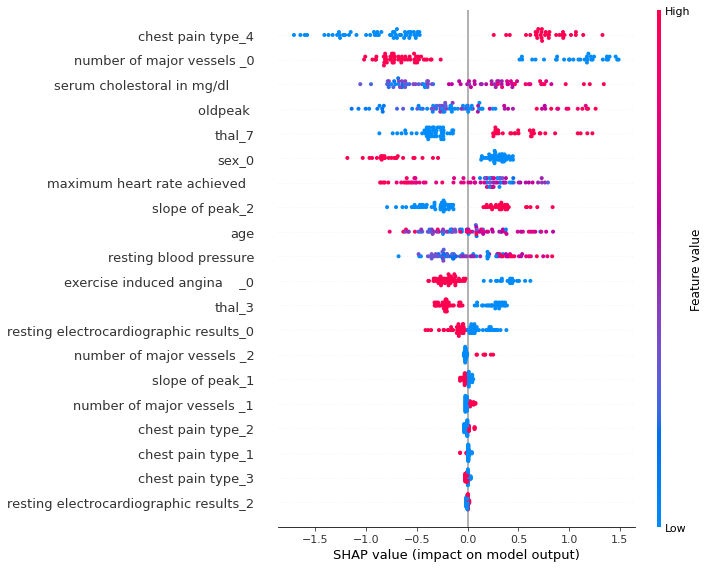

In [8]:
interpret_model(xgboost)

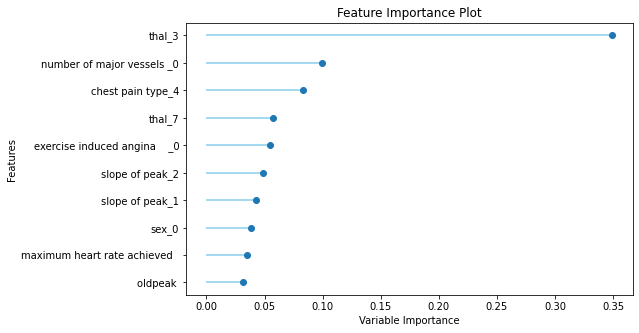

In [9]:
plot_model(xgboost, plot = 'feature')


In [5]:
You can now create a logistic regression model

SyntaxError: invalid syntax (<ipython-input-5-8ebf564aa173>, line 1)

In [ ]:
lr = create_model('lr')

You now have mean model performances on training data for logistic regression. 

You can now tweak or adjust the algorithm. This is known as hyperparamter optimization or tuning. Note that the AUC after tuning is actually a little worse 


In [ ]:
tuned_lr = tune_model('lr')

In [ ]:
We are now going to plot the AUC for logistic regression. We would write code to produce other visualizations but 
AUC is the gold standard for classification

In [ ]:
xgboost = create_model('xgboost')

In [6]:
interpret_model(xgboost)

NameError: name 'xgboost' is not defined

In [ ]:
evaluate_model (lr)

The last thing we will do is to run the model on the test dataset (30%) to see what its performance is. Remember that test results are usually lower than training results. In this case it appears that the test data performed better which would suggest "underfitting". The other thing to notice is that PyCaret converted several columns to multiple columns for interpretation. Creating new columns like this is known as one-hot encoding

In [ ]:
predict_model(lr)